<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB
(5001, 7)
(5001,)
['Male' 'Female' 'Male' ... 'Female' 'Female' 'Female']
Accuracy 96.73550966022651
[[710  24]
 [ 25 742]]
['Male' 'Female' 'Male' ... 'Female' 'Female' 'Female']
Accuracy 97.06862091938707
[[712  22]
 [ 22 745]]
Female


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


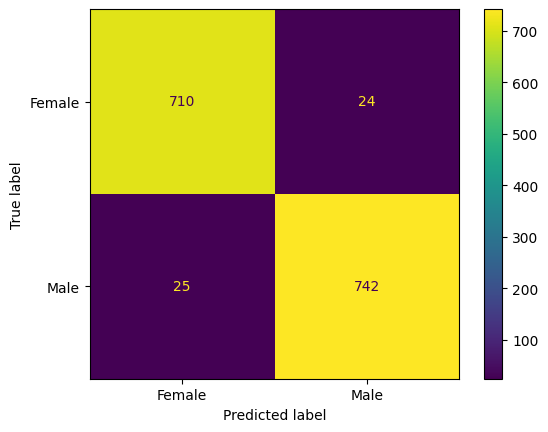

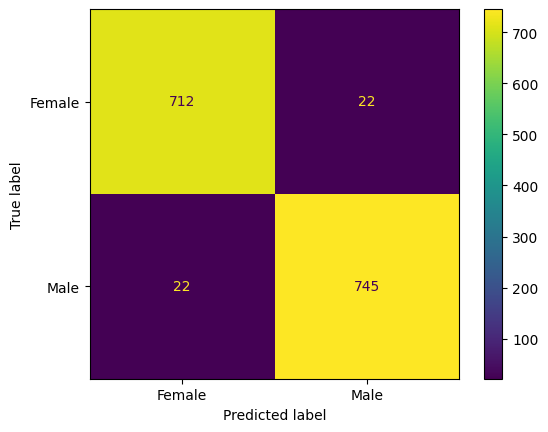

In [27]:
import pandas as pd
df = pd.read_csv("/content/sample_data/gender_classification_v7.csv")
df.head()
df.shape

df.info()

df.columns

df.isnull().sum()

df.isnull().sum().sum()

df['gender'].value_counts()
df.columns

x = df[['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide',
       'nose_long', 'lips_thin', 'distance_nose_to_lip_long']]

y = df['gender']
print(x.shape)
print(y.shape)

#split Data
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.3)
Y_test.shape

X_train.shape

Y_train.shape

#logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix,accuracy_score
lr = LogisticRegression()
lr.fit(X_train,Y_train)

y_pred = lr.predict(X_test)
print(y_pred)

print("Accuracy",accuracy_score(Y_test,y_pred)*100)

cm = confusion_matrix(Y_test,y_pred)
print(cm)

cmd = ConfusionMatrixDisplay(cm,display_labels = lr.classes_)

cmd.plot()

from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix,accuracy_score

lr = SVC()
lr.fit(X_train,Y_train)
y_pred = lr.predict(X_test)
print(y_pred)
print("Accuracy",accuracy_score(Y_test,y_pred)*100)

cm = confusion_matrix(Y_test,y_pred)
print(cm)

cmd = ConfusionMatrixDisplay(cm,display_labels = lr.classes_)
cmd.plot()

#last one
from sklearn.tree import DecisionTreeClassifier
lr = DecisionTreeClassifier()
lr.fit(X_train,Y_train)

y_pred = lr.predict(X_test)

import pickle
import numpy as np
pickle.dump(lr,open("GenderModel.pkl",'wb'))

#loadind the model

data=[1,5,8,1,0,0,1]
model = pickle.load(open('GenderModel.pkl','rb'))
arr = np.array(data).reshape(1,-1)
arr
result = model.predict(arr)
print(result[0])